# 数据清洗和探索数据

In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("C:/Users/Administrator/Desktop/python/项目报告及数据思维/项目报告及数据思维/air_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 44 columns):
MEMBER_NO                  62988 non-null int64
FFP_DATE                   62988 non-null object
FIRST_FLIGHT_DATE          62988 non-null object
GENDER                     62985 non-null object
FFP_TIER                   62988 non-null int64
WORK_CITY                  60719 non-null object
WORK_PROVINCE              59740 non-null object
WORK_COUNTRY               62962 non-null object
AGE                        62568 non-null float64
LOAD_TIME                  62988 non-null object
FLIGHT_COUNT               62988 non-null int64
BP_SUM                     62988 non-null int64
EP_SUM_YR_1                62988 non-null int64
EP_SUM_YR_2                62988 non-null int64
SUM_YR_1                   62437 non-null float64
SUM_YR_2                   62850 non-null float64
SEG_KM_SUM                 62988 non-null int64
WEIGHTED_SEG_KM            62988 non-null float64
LAST_FLIGHT_

In [5]:
#查看缺失值
df.isnull().sum()

MEMBER_NO                     0
FFP_DATE                      0
FIRST_FLIGHT_DATE             0
GENDER                        3
FFP_TIER                      0
WORK_CITY                  2269
WORK_PROVINCE              3248
WORK_COUNTRY                 26
AGE                         420
LOAD_TIME                     0
FLIGHT_COUNT                  0
BP_SUM                        0
EP_SUM_YR_1                   0
EP_SUM_YR_2                   0
SUM_YR_1                    551
SUM_YR_2                    138
SEG_KM_SUM                    0
WEIGHTED_SEG_KM               0
LAST_FLIGHT_DATE              0
AVG_FLIGHT_COUNT              0
AVG_BP_SUM                    0
BEGIN_TO_FIRST                0
LAST_TO_END                   0
AVG_INTERVAL                  0
MAX_INTERVAL                  0
ADD_POINTS_SUM_YR_1           0
ADD_POINTS_SUM_YR_2           0
EXCHANGE_COUNT                0
avg_discount                  0
P1Y_Flight_Count              0
L1Y_Flight_Count              0
P1Y_BP_S

## 确定项目需求和背景

### 项目背景

某航空公司需要以客户为中⼼，按照客户的需求，在对客户的特点了解上使⽤不同的营 销⼿段，⽬的是
争取更多新客户，降低客户流失率，降低服务成本，提⾼业务收⼊，增加 ARPU 值(average revenue
per user 每个⽤户的平均收益，⼀般以⽉为单位)，进⾏精准的市场营销策略制定 。

### 项目需求

本项⽬的⽬标客户是公众客户(客户分为公众客户、商业客户即公司、⼤客户)，因⽽只对公众客户进⾏
分群。初步的⽬标是中⾼端⽤户、中端⽤户、低端⽤户、其他需求⽤户。 但这是经验⽽⾔，最终结果需
要看模型的运⾏结果，不能主观臆断。

### 项目输出

根据客户信息，对客户进⾏分类。针对不同类型客户进⾏特征提取，分析不同类型客户的价值。采取个
性化服务，根据客户类型，制定相应营销策略。

### 方法

最近消费时间间隔（Recency）
消费频率（Frenquency）
消费金额（Monetary）
-RFM模型

由于航空公司票价受到飞行距离、舱位等级等多种因素影响，同样消费金额的不同旅客对航空公司的价值是不同的。因此单纯的RFM模型并不是适用航空客户价值分析。所以选择客户在一定时间内累积的飞行里程M和客户在一定时间内的平均折扣率C两个指标代替消费金额。另外再增加一个指标就是会员入会时间，这个指标在一定程度也会影响客户价值。

构造LRFMC指标：

L=LOAD_TIME - FFP_DATE(观测窗口的结束时间 - 入会时间)
R=LAST_TO_END(最后一次乘坐飞机距观测窗口结束的时长)
F=FLIGHT_COUNT(观测窗口内的飞行次数)
M=SEG_KM_SUM(观测窗口内的总飞行里程)
C=AVG_DISCOUNT(平均折扣率)

## 探索数据

| 序号 | 属性名称                           | 说明                                                         |
| ---- | ---------------------------------- | ------------------------------------------------------------ |
| 1    | 会员卡号                           |                                                              |
| 2    | 入会时间                           | 办理会员卡的开始时间                                         |
| 3    | 第一次飞行日期                     |                                                              |
| 4    | 性别                               |                                                              |
| 5    | 会员卡级别                         |                                                              |
| 6    | 工作地城市                         |                                                              |
| 7    | 工作地所在省份                     |                                                              |
| 8    | 工作地所在国家                     |                                                              |
| 9    | 年龄                               |                                                              |
| 10   | 观测窗口的结束时间                 | 选取样本的时间宽度，距离现在最近的时间                       |
| 11   | 飞行次数                           | 频数                                                         |
| 12   | 观测窗口总基本积分                 | 航空公里的里程就相当于积分，积累一定分数可以兑换奖品和免费里程 |
| 13   | 第1年精英资格积分                  |                                                              |
| 14   | 第2年精英资格积分                  |                                                              |
| 15   | 第1年总票价                        |                                                              |
| 16   | 第2年总票价                        |                                                              |
| 17   | 观测窗口总飞行公里数               |                                                              |
| 18   | 观测窗口总加权飞行公里数           | $\sum(舱位折扣\times 航段距离)$                              |
| 19   | 末次飞行日期                       | 最后一次飞行时间                                             |
| 20   | 观测窗口季度平均飞行次数           |                                                              |
| 21   | 观测窗口季度平均基本积分累积       |                                                              |
| 22   | 观察窗口内第一次乘机时间至MAX时长  | 观察窗口时段，入会时长                                       |
| 23   | 最后一次乘机时间至观察窗口末端时长 |                                                              |
| 24   | 平均乘机时间间隔                   |                                                              |
| 25   | 观察窗口内最大乘机间隔             |                                                              |
| 26   | 观测窗口中第1年其他积分            | 合作伙伴、促销、外航转入等                                   |
| 27   | 观测窗口中第2年其他积分            | 合作伙伴、促销、外航转入等                                   |
| 28   | 积分兑换次数                       |                                                              |
| 29   | 平均折扣率                         |                                                              |
| 30   | 第1年乘机次数                      |                                                              |
| 31   | 第2年乘机次数                      |                                                              |
| 32   | 第1年里程积分                      |                                                              |
| 33   | 第2年里程积分                      |                                                              |
| 34   | 观测窗口总精英积分                 |                                                              |
| 35   | 观测窗口中其他积分                 | 合作伙伴、促销、外航转入等                                   |
| 36   | 非乘机积分总和                     |                                                              |
| 37   | 第2年非乘机积分总和                |                                                              |
| 38   | 总累计积分                         |                                                              |
| 39   | 第2年观测窗口总累计积分            |                                                              |
| 40   | 第2年乘机次数比率                  |                                                              |
| 41   | 第1年乘机次数比率                  |                                                              |
| 42   | 第1年里程积分占最近两年积分比例    |                                                              |
| 43   | 第2年里程积分占最近两年积分比例    |                                                              |
| 44   | 非乘机的积分变动次数               |                                                              |


In [9]:
#查看缺失值
df.isnull().sum()

MEMBER_NO                     0
FFP_DATE                      0
FIRST_FLIGHT_DATE             0
GENDER                        3
FFP_TIER                      0
WORK_CITY                  2269
WORK_PROVINCE              3248
WORK_COUNTRY                 26
AGE                         420
LOAD_TIME                     0
FLIGHT_COUNT                  0
BP_SUM                        0
EP_SUM_YR_1                   0
EP_SUM_YR_2                   0
SUM_YR_1                    551
SUM_YR_2                    138
SEG_KM_SUM                    0
WEIGHTED_SEG_KM               0
LAST_FLIGHT_DATE              0
AVG_FLIGHT_COUNT              0
AVG_BP_SUM                    0
BEGIN_TO_FIRST                0
LAST_TO_END                   0
AVG_INTERVAL                  0
MAX_INTERVAL                  0
ADD_POINTS_SUM_YR_1           0
ADD_POINTS_SUM_YR_2           0
EXCHANGE_COUNT                0
avg_discount                  0
P1Y_Flight_Count              0
L1Y_Flight_Count              0
P1Y_BP_S

所需维度无缺失值

In [13]:
explore=df.describe().T
explore

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.00,15747.750000,31494.500000,47241.250000,62988.000000
FFP_TIER,62988.0,4.102162,0.373856,4.00,4.000000,4.000000,4.000000,6.000000
AGE,62568.0,42.476346,9.885915,6.00,35.000000,41.000000,48.000000,110.000000
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.00,3.000000,7.000000,15.000000,213.000000
BP_SUM,62988.0,10925.081254,16339.486151,0.00,2518.000000,5700.000000,12831.000000,505308.000000
EP_SUM_YR_1,62988.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
EP_SUM_YR_2,62988.0,265.689623,1645.702854,0.00,0.000000,0.000000,0.000000,74460.000000
SUM_YR_1,62437.0,5355.376064,8109.450147,0.00,1003.000000,2800.000000,6574.000000,239560.000000
SUM_YR_2,62850.0,5604.026014,8703.364247,0.00,780.000000,2773.000000,6845.750000,234188.000000
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.00,4747.000000,9994.000000,21271.250000,580717.000000


In [15]:
explore['null']=df.shape[0]-explore['count']
explore=explore[['null','min','max']]

### 数据清洗

In [22]:
# 数据清洗，过滤掉不符合规则的数据
# 过滤掉票价为空的记录
df=df[df['SUM_YR_1'].notnull()*df['SUM_YR_2'].notnull()] 

In [23]:
# 只保留票价非零的，或者平均折扣率与总飞行公里数同时为0的记录。
index1 = df['SUM_YR_1'] != 0
index2 = df['SUM_YR_2'] != 0
index3 = (df['SEG_KM_SUM'] == 0) & (df['avg_discount'] == 0) # 逻辑与
df = df[index1 | index2 | index3] # 逻辑或
df.shape

(62044, 44)

### 属性约束

In [24]:
df = df[['LOAD_TIME','FFP_DATE','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
df.head(20)

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2014/03/31,2006/11/02,1,210,580717,0.961639
1,2014/03/31,2007/02/19,7,140,293678,1.252314
2,2014/03/31,2007/02/01,11,135,283712,1.254676
3,2014/03/31,2008/08/22,97,23,281336,1.090870
4,2014/03/31,2009/04/10,5,152,309928,0.970658
5,2014/03/31,2008/02/10,79,92,294585,0.967692
6,2014/03/31,2006/03/22,1,101,287042,0.965347
7,2014/03/31,2010/04/09,3,73,287230,0.962070
8,2014/03/31,2011/06/07,6,56,321489,0.828478
9,2014/03/31,2010/07/05,15,64,375074,0.708010


L=LOAD_TIME - FFP_DATE(观测窗口的结束时间 - 入会时间) R=LAST_TO_END(最后一次乘坐飞机距观测窗口结束的时长) F=FLIGHT_COUNT(观测窗口内的飞行次数) M=SEG_KM_SUM(观测窗口内的总飞行里程) C=AVG_DISCOUNT(平均折扣率)

### 属性变换

In [25]:
import datetime

In [33]:
df['L']=(pd.to_datetime(df['LOAD_TIME'])-pd.to_datetime(df['FFP_DATE'])).dt.days
df['R']=df['LAST_TO_END']
df['F']=df['FLIGHT_COUNT']
df['M']=df['SEG_KM_SUM']
df['C'] = df['avg_discount']

In [76]:
data = df[['L','R','F','M','C']]

In [77]:
data.head()

,L,R,F,M,C
0,2706,1,210,580717,0.961639
1,2597,7,140,293678,1.252314
2,2615,11,135,283712,1.254676
3,2047,97,23,281336,1.090870
4,1816,5,152,309928,0.970658


# 建模

## 标准化

In [78]:
# 标准差标准化
data_sta = (data - data.mean(axis = 0))/(data.std(axis = 0)) # 处理后的数据均值为0，标准差为1.
data_sta.columns=['Z'+i for i in data_sta.columns] # 表头重命名。
data_sta.head()

,ZL,ZR,ZF,ZM,ZC
0,1.435707,-0.944948,14.034016,26.761154,1.295540
1,1.307152,-0.911894,9.073213,13.126864,2.868176
2,1.328381,-0.889859,8.718869,12.653481,2.880950
3,0.658476,-0.416098,0.781585,12.540622,1.994714
4,0.386032,-0.922912,9.923636,13.898736,1.344335


## 定义函数建模

In [48]:
from sklearn.cluster import KMeans # 导入K均值聚类算法
import matplotlib.pyplot as plt
# 导入轮廓系数API
from sklearn.metrics import silhouette_score
def TrainCluster(data, start_k=1, end_k=11):
    K = []
    SSE = []
    Sil=[]
    for i in range(start_k, end_k):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        y_pred=kmeans.fit_predict(data)

        SSE.append(kmeans.inertia_)  # 保存每一个k值的SSE值
        K.append(i)
        print('{} Means SSE loss = {}'.format(i, kmeans.inertia_))


    plt.plot(range(1,11),SSE,marker='o')
    plt.xlabel('K')
    plt.ylabel('inertias')
   

1 Means SSE loss = 310215.0000000459
2 Means SSE loss = 229344.906809607
3 Means SSE loss = 184343.83505412444
4 Means SSE loss = 151010.66191812206
5 Means SSE loss = 133360.13575025735
6 Means SSE loss = 118067.1434317108
7 Means SSE loss = 107633.26183411632
8 Means SSE loss = 100707.37979105461
9 Means SSE loss = 93871.95730061349
10 Means SSE loss = 88329.96843957272


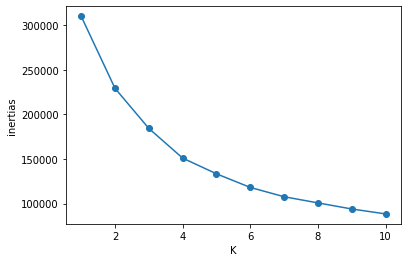

In [49]:
TrainCluster(data_sta, start_k=1, end_k=11)

In [58]:
from sklearn.cluster import KMeans # 导入K均值聚类算法
import matplotlib.pyplot as plt
# 导入轮廓系数API
from sklearn.metrics import silhouette_score
#绘制学习曲线
sil=[]
for i in range(2,11):
#聚类，fit_predict()可以直接用
    kmeans=KMeans(n_clusters=i,random_state=666)
    y_pred=kmeans.fit_predict(data_sta)
    #轮廓系数
    s=silhouette_score(data_sta,y_pred)
    sil.append(s)   

Text(0, 0.5, 'sil')

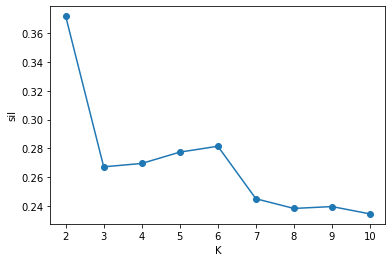

In [60]:
plt.plot(range(2,11),sil,marker='o')
plt.xlabel('K')
plt.ylabel('sil')

In [61]:
kmeans=KMeans(n_clusters=6,random_state=666)
y_pred=kmeans.fit_predict(data_sta)
centers=kmeans.cluster_centers_
labels=kmeans.labels_

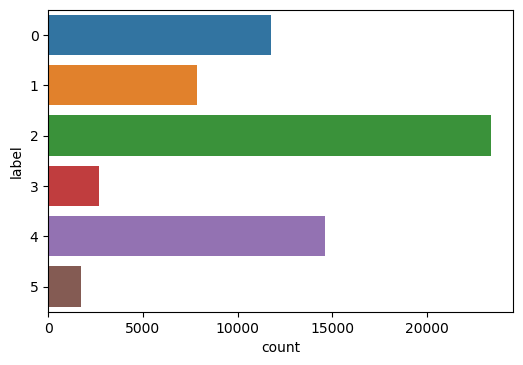

In [67]:
import seaborn as sns
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(y=data_sta['label'])
#主要人群的标签是1,2,3 

In [79]:
r1 = pd.Series(kmeans.labels_).value_counts() # 统计频数
r2 = pd.DataFrame(kmeans.cluster_centers_) # 聚类中心
r = pd.concat([r2,r1],axis=1)
r.columns = list(data_sta.columns) + ['聚类个数']
r

,ZL,ZR,ZF,ZM,ZC,聚类个数
0,-0.331714,1.718951,-0.574074,-0.537122,-0.111021,11767
1,0.261090,-0.723433,1.293443,1.229896,0.079246,7869
2,-0.719223,-0.363802,-0.275034,-0.272233,-0.235448,23368
3,0.170575,-0.085291,-0.090155,-0.079328,2.773666,2690
4,1.161560,-0.296447,-0.238726,-0.239541,-0.151179,14623
5,0.701946,-0.849839,3.903170,3.893086,0.536321,1727


# 客户价值分析

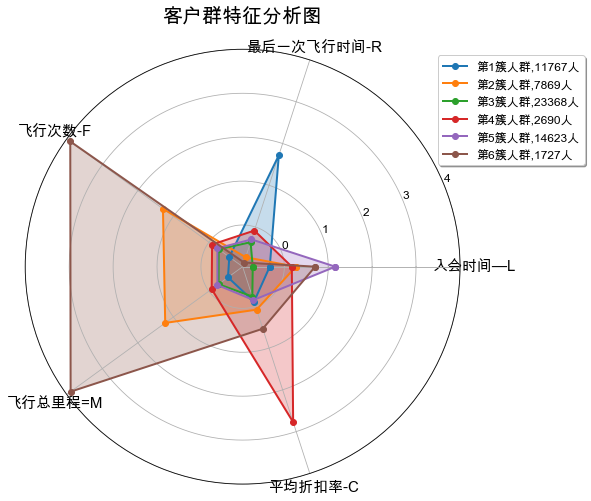

In [80]:
#plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['font.family']='Arial Unicode MS'
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False

r1 = pd.Series(kmeans.labels_).value_counts()  # 统计各个类别的数目
r2 = pd.DataFrame(kmeans.cluster_centers_)  # 找出聚类中心
# 所有簇中心坐标值中最大值和最小值
max = r2.values.max()
min = r2.values.min()
r = pd.concat([r2, r1], axis=1)  # 横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(data_sta.columns) + [u'类别数目']  # 重命名表头

# 绘图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)
center_num = r.values
feature = ["入会时间—L", '最后一次飞行时间-R',"飞行次数-F", "飞行总里程=M", "平均折扣率-C"]
N = len(feature)
for i, v in enumerate(center_num):
    # 设置雷达图的角度，用于平分切开一个圆面
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1], [v[0]]))
    angles = np.concatenate((angles, [angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label="第%d簇人群,%d人" % (i + 1, v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180 / np.pi, feature, fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(min - 0.1, max + 0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), ncol=1, fancybox=True, shadow=True)
    # bbox 指定图例在轴的位置  ncol 设置图例分为n列展示 fancybox 控制是否应在构成图例背景的FancyBboxPatch周围启用圆边

# 显示图形
plt.show()


第1簇人群最多，R越高粘性越低，是流失用户，需要激活用户；第3簇人群RFM都低，人数也最多，代表新客户，人数也是最多的，建议需要推广；第5簇人群，入会时间较长，需要召回的客户；第2簇人群飞行次数和飞行总里程都较高，最近也有消费，说明是重要发展客户，需要重点识别；第6簇人群是重要价值用户，也是我们的优质客户，第4簇人群最近有消费，总的消费次数和里程都不高，但是平均折扣率都很高，因此需要推广折扣票价的机票

| 客户类型     | 最近一次交易距离观测窗口的天数（黏性） | 累计交易频次（忠诚度） | 累计交易成交额（消费能力） | 对应场景                                         |
| ------------ | -------------------------------------- | ---------------------- | -------------------------- | ------------------------------------------------ |
| 重要价值客户 | +                                      | +                      | +                          | RFM都很大，优质客户                              |
| 重要召回客户 | -                                      | +                      | +                          | 成交量和成交额都很大，但是最近没有交易，需要召回 |
| 重要发展客户 | +                                      | -                      | +                          | 成交额大，最近有交易，需要重点识别               |
| 重要挽留客户 | -                                      | -                      | +                          | 成交额大，潜在的价值客户，需要挽留               |
| 潜力客户     | +                                      | +                      | -                          | 成交量大，且最近有交易，需要挖掘                 |
| 新客户       | +                                      | -                      | -                          | 最近有交易，是新客户，需要推广                   |
| 一般维持客户 | -                                      | +                      | -                          | 成交量大，但是贡献不大，黏性也不高，一般维持     |
| 流失客户     | -                                      | -                      | -                          | 已经流失的客户                                   |




# 电商案例的RFM模型

五个步骤：数据概览、数据清洗、维度打分、分值计算、客户分层

In [81]:
import numpy as np
import pandas as pd

In [83]:
df=pd.read_excel("C:/Users/Administrator/Desktop/python/项目报告及数据思维/项目报告及数据思维/PYTHON-RFM实战数据.xlsx")
df.head()

,品牌名称,买家昵称,付款日期,订单状态,实付金额,邮费,省份,城市,购买数量
0,CDA数据分析,叫我李2,2019-01-01 00:17:59,交易成功,186,6,上海,上海市,1
1,CDA数据分析,0cyb1992,2019-01-01 00:59:54,交易成功,145,0,广东省,广州市,1
2,CDA数据分析,萝污萌莉,2019-01-01 07:48:48,交易成功,194,8,山东省,东营市,1
3,CDA数据分析,atblovemyy,2019-01-01 09:15:49,付款以后用户退款成功，交易自动关闭,84,0,江苏省,镇江市,1
4,CDA数据分析,小星期鱼,2019-01-01 09:59:33,付款以后用户退款成功，交易自动关闭,74,0,上海,上海市,1


-R 每个客户有多少天没有回购，可以理解为最近一次购买到现在多少天没有回购；
-F 每个客户购买多少次
-M 每个客户平均购买金额，累积的购买金额

将数据分成标准的8类，然后根据每一类用户人数占比，金额共线不同等特征，进行人 货 场 三重匹配的特征

## 数据清洗和数据探索

In [86]:
df.info()
#城市有一个缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28833 entries, 0 to 28832
Data columns (total 9 columns):
品牌名称    28833 non-null object
买家昵称    28833 non-null object
付款日期    28833 non-null datetime64[ns]
订单状态    28833 non-null object
实付金额    28833 non-null int64
邮费      28833 non-null int64
省份      28833 non-null object
城市      28832 non-null object
购买数量    28833 non-null int64
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 2.0+ MB


In [88]:
df.订单状态.unique()
#可删除

array(['交易成功', '付款以后用户退款成功，交易自动关闭'], dtype=object)

In [90]:
df=df[df.订单状态=='交易成功']
#剔除退款的行，只保留交易成功的行

## 属性规约

In [93]:
df=df[['买家昵称','付款日期','实付金额']]

In [94]:
df.head()

,买家昵称,付款日期,实付金额
0,叫我李2,2019-01-01 00:17:59,186
1,0cyb1992,2019-01-01 00:59:54,145
2,萝污萌莉,2019-01-01 07:48:48,194
5,重碎叠,2019-01-01 10:00:07,197
6,iho_jann,2019-01-01 10:00:08,168


### 构建R

In [95]:
import datetime

In [ ]:
R,如果用户只下单过一次，就用现在的时间减去付款日期，如果用户下单过多次，就直接采用最小值；按照买家昵称进行分组，然后降序排序

In [140]:
r=df.groupby(by='买家昵称')['付款日期'].max().reset_index()

In [141]:
r['R']=(pd.to_datetime('2019-07-01')-r['付款日期']).dt.days

In [142]:
r=r[['买家昵称','R']]

### 构建F

In [109]:
df['日期标签']=df['付款日期'].astype(str).str[:10]

In [112]:
#将用户
dup=df.groupby(by=['买家昵称','日期标签'])['付款日期'].count().reset_index()
dup.head()

,买家昵称,日期标签,付款日期
0,.blue_ram,2019-02-04,1
1,.christiny,2019-01-29,1
2,.willn1,2019-01-11,1
3,.托托m,2019-01-11,1
4,0000妮,2019-06-28,1


In [114]:
dup.付款日期.unique()

array([1, 3, 2, 5, 4, 8], dtype=int64)

In [119]:
dup[dup.付款日期==8]

,买家昵称,日期标签,付款日期
22544,小kk铺,2019-05-16,8


In [120]:
df

,买家昵称,付款日期,实付金额,日期标签
0,叫我李2,2019-01-01 00:17:59.000,186,2019-01-01
1,0cyb1992,2019-01-01 00:59:54.000,145,2019-01-01
2,萝污萌莉,2019-01-01 07:48:48.000,194,2019-01-01
5,重碎叠,2019-01-01 10:00:07.000,197,2019-01-01
6,iho_jann,2019-01-01 10:00:08.000,168,2019-01-01
7,2jill27,2019-01-01 10:00:11.000,121,2019-01-01
8,yjessieni,2019-01-01 10:00:14.000,211,2019-01-01
9,4张洁85,2019-01-01 11:41:02.000,170,2019-01-01
10,8tb4249_11,2019-01-01 12:08:49.000,124,2019-01-01
11,一李一,2019-01-01 12:22:16.000,247,2019-01-01


In [121]:
f=dup.groupby(by='买家昵称')['付款日期'].count().reset_index()
f.columns=['买家昵称','F']
f.head()

,买家昵称,F
0,.blue_ram,1
1,.christiny,1
2,.willn1,1
3,.托托m,1
4,0000妮,1


In [122]:
f['F'].unique()

array([1, 2, 3, 4, 5, 7], dtype=int64)

### 构建M

In [130]:
sum_me=df.groupby('买家昵称').实付金额.sum().reset_index()
sum_me.columns=['买家昵称','总实付金额']
comb=pd.merge(sum_me,f,on='买家昵称',how='inner')

In [133]:
comb['M']=comb['总实付金额']/comb['F']

In [134]:
comb

,买家昵称,总实付金额,F,M
0,.blue_ram,49,1,49.0
1,.christiny,183,1,183.0
2,.willn1,34,1,34.0
3,.托托m,37,1,37.0
4,0000妮,164,1,164.0
5,0009797王,94,1,94.0
6,000xyx0,99,1,99.0
7,000米粒儿米粒0,170,1,170.0
8,00556旭79618,159,1,159.0
9,00不哭0,53,1,53.0


In [143]:
rfm=pd.merge(r,comb,on='买家昵称')

In [144]:
rfm=rfm.iloc[:,[0,1,3,4]]

### 构建RFM

In [145]:
rfm

,买家昵称,R,F,M
0,.blue_ram,146,1,49.0
1,.christiny,152,1,183.0
2,.willn1,170,1,34.0
3,.托托m,170,1,37.0
4,0000妮,2,1,164.0
5,0009797王,127,1,94.0
6,000xyx0,73,1,99.0
7,000米粒儿米粒0,148,1,170.0
8,00556旭79618,157,1,159.0
9,00不哭0,159,1,53.0


## 维度打分

对于R,设置30天为1个跨度，区间左闭右开；
1分：120+
2分：90-120
3分：60-90
4分：30-60
5分：0-30

对于F,
购买1次，1分；2次，2分；5次及以上是5分

对于M，1分：0-50；2分 50-100 3分100-150 ；4分 150-200 ；5分 200+

In [146]:
rfm

,买家昵称,R,F,M
0,.blue_ram,146,1,49.0
1,.christiny,152,1,183.0
2,.willn1,170,1,34.0
3,.托托m,170,1,37.0
4,0000妮,2,1,164.0
5,0009797王,127,1,94.0
6,000xyx0,73,1,99.0
7,000米粒儿米粒0,148,1,170.0
8,00556旭79618,157,1,159.0
9,00不哭0,159,1,53.0


In [148]:
rfm['R-score']=pd.cut(rfm['R'],bins=[0,30,60,90,120,1000000],labels=[5,4,3,2,1],right=False).astype(float)
rfm['F-score']=pd.cut(rfm['F'],bins=[1,2,3,4,5,1000000],labels=[1,2,3,4,5],right=False).astype(float)
rfm['M-score']=pd.cut(rfm['M'],bins=[0,50,100,150,200,1000000],labels=[1,2,3,4,5],right=False).astype(float)

In [152]:
rfm.head()

,买家昵称,R,F,M,R-score,F-score,M-score,R是否大于均值,F是否大于均值,M是否大于均值
0,.blue_ram,146,1,49.0,1.0,1.0,1.0,0,0,0
1,.christiny,152,1,183.0,1.0,1.0,4.0,0,0,1
2,.willn1,170,1,34.0,1.0,1.0,1.0,0,0,0
3,.托托m,170,1,37.0,1.0,1.0,1.0,0,0,0
4,0000妮,2,1,164.0,5.0,1.0,4.0,1,0,1


和平均值对比，减少客户分类数量

In [151]:
rfm['R是否大于均值']=(rfm['R-score']>rfm['R-score'].mean())*1
rfm['F是否大于均值']=(rfm['F-score']>rfm['F-score'].mean())*1
rfm['M是否大于均值']=(rfm['M-score']>rfm['M-score'].mean())*1
rfm.head()

,买家昵称,R,F,M,R-score,F-score,M-score,R是否大于均值,F是否大于均值,M是否大于均值
0,.blue_ram,146,1,49.0,1.0,1.0,1.0,0,0,0
1,.christiny,152,1,183.0,1.0,1.0,4.0,0,0,1
2,.willn1,170,1,34.0,1.0,1.0,1.0,0,0,0
3,.托托m,170,1,37.0,1.0,1.0,1.0,0,0,0
4,0000妮,2,1,164.0,5.0,1.0,4.0,1,0,1


## 客户分层

In [153]:
rfm['客户人群']=rfm['R是否大于均值']*100+rfm['F是否大于均值']*10+rfm['M是否大于均值']*1
rfm

,买家昵称,R,F,M,R-score,F-score,M-score,R是否大于均值,F是否大于均值,M是否大于均值,客户人群
0,.blue_ram,146,1,49.0,1.0,1.0,1.0,0,0,0,0
1,.christiny,152,1,183.0,1.0,1.0,4.0,0,0,1,1
2,.willn1,170,1,34.0,1.0,1.0,1.0,0,0,0,0
3,.托托m,170,1,37.0,1.0,1.0,1.0,0,0,0,0
4,0000妮,2,1,164.0,5.0,1.0,4.0,1,0,1,101
5,0009797王,127,1,94.0,1.0,1.0,2.0,0,0,0,0
6,000xyx0,73,1,99.0,3.0,1.0,2.0,1,0,0,100
7,000米粒儿米粒0,148,1,170.0,1.0,1.0,4.0,0,0,1,1
8,00556旭79618,157,1,159.0,1.0,1.0,4.0,0,0,1,1
9,00不哭0,159,1,53.0,1.0,1.0,2.0,0,0,0,0


## 基于指标给客户打标签

In [156]:
def transform_label(x):
    if x==111:
        label='重要价值客户'
    elif x==101:
        label='频次深耕客户'
    elif x==110:
        label='消费潜力客户'
    elif x==100:
        label='新客户'
    elif x==11:
        label='重要价值流失预警用户'
    elif x==10:
        label='一般普通客户'
    elif x==1:
        label='重要挽留客户'
    else:
        label='已经流失用户'
    return label

In [157]:
rfm['人群类型']=rfm.客户人群.map(transform_label)

In [159]:
rfm

,买家昵称,R,F,M,R-score,F-score,M-score,R是否大于均值,F是否大于均值,M是否大于均值,客户人群,人群类型
0,.blue_ram,146,1,49.0,1.0,1.0,1.0,0,0,0,0,已经流失用户
1,.christiny,152,1,183.0,1.0,1.0,4.0,0,0,1,1,重要挽留客户
2,.willn1,170,1,34.0,1.0,1.0,1.0,0,0,0,0,已经流失用户
3,.托托m,170,1,37.0,1.0,1.0,1.0,0,0,0,0,已经流失用户
4,0000妮,2,1,164.0,5.0,1.0,4.0,1,0,1,101,频次深耕客户
5,0009797王,127,1,94.0,1.0,1.0,2.0,0,0,0,0,已经流失用户
6,000xyx0,73,1,99.0,3.0,1.0,2.0,1,0,0,100,新客户
7,000米粒儿米粒0,148,1,170.0,1.0,1.0,4.0,0,0,1,1,重要挽留客户
8,00556旭79618,157,1,159.0,1.0,1.0,4.0,0,0,1,1,重要挽留客户
9,00不哭0,159,1,53.0,1.0,1.0,2.0,0,0,0,0,已经流失用户


## 人数统计

In [160]:
count=rfm['人群类型'].value_counts().reset_index()
count.columns=['客户类型','人数']
count['人数占比']=round(count['人数']/count['人数'].sum()*100,2)

In [161]:
count

,客户类型,人数,人数占比
0,重要挽留客户,7338,28.87
1,已经流失用户,6680,26.28
2,频次深耕客户,5427,21.35
3,新客户,4224,16.62
4,重要价值客户,756,2.97
5,消费潜力客户,450,1.77
6,重要价值流失预警用户,360,1.42
7,一般普通客户,185,0.73


## 金额统计

In [162]:
rfm['购买总金额']=rfm['F']*rfm['M']
mon=rfm.groupby('人群类型')['购买总金额'].sum().reset_index()
mon.columns=['客户类型','消费金额']
mon['消费金额占比']=round(mon['消费金额']/mon['消费金额'].sum()*100,2)
mon

,客户类型,消费金额,消费金额占比
0,一般普通客户,25803.0,0.73
1,已经流失用户,444617.0,12.66
2,新客户,270869.0,7.71
3,消费潜力客户,64075.0,1.82
4,重要价值客户,269230.0,7.67
5,重要价值流失预警用户,116665.0,3.32
6,重要挽留客户,1338153.0,38.11
7,频次深耕客户,981893.0,27.96


In [163]:
result=pd.merge(count,mon,on='客户类型')
result

,客户类型,人数,人数占比,消费金额,消费金额占比
0,重要挽留客户,7338,28.87,1338153.0,38.11
1,已经流失用户,6680,26.28,444617.0,12.66
2,频次深耕客户,5427,21.35,981893.0,27.96
3,新客户,4224,16.62,270869.0,7.71
4,重要价值客户,756,2.97,269230.0,7.67
5,消费潜力客户,450,1.77,64075.0,1.82
6,重要价值流失预警用户,360,1.42,116665.0,3.32
7,一般普通客户,185,0.73,25803.0,0.73


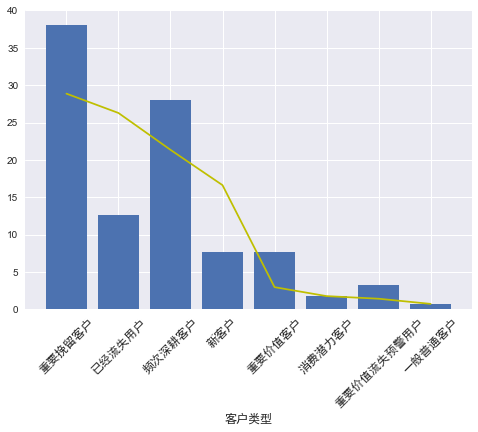

In [165]:
import seaborn as sns
from matplotlib.font_manager import FontManager
plt.style.use('seaborn')
plt.bar(result['客户类型'],result['消费金额占比'])
plt.xticks(result['客户类型'].values,fontproperties='SimHei',rotation=45)
plt.xlabel('客户类型',fontproperties='SimHei')
plt.plot(result['客户类型'],result['人数占比'],color='y')
plt.show()